Data Preparation

In [85]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# read data
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')
all = pd.concat([train,test])

In [37]:
# menampilkan data
test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Preprocessing

In [38]:
# duplikasi data mentah ke data untuk diolah
train_olah = train.copy()
train_olah.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# melihat presentase data missing
train_olah.isna().sum() / train_olah.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [40]:
#  delete cabin
del train_olah['Cabin']

In [41]:
#  hapus data age missing
train_olah = train_olah[~(train_olah['Age'].isna())]

In [42]:
#  ambil modus data embarked
train_olah['Embarked'].mode()

0    S
dtype: object

In [43]:
#  isi data missing embarked dengan modus
train_olah['Embarked'] = train_olah['Embarked'].fillna(train_olah['Embarked'].mode()[0])
train_olah['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [44]:
#  cek ulang data missing
train_olah.isna().sum() / train_olah.shape[0] * 100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [45]:
#  cek data aneh di age
train_olah.loc[(train_olah['Age']%1 != 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,Q
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,C
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.0500,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,C


In [58]:
#  fix data usia desimal > 1
train_olah['Age'].loc[(train_olah['Age']%1 != 0) & (train_olah['Age'] > 1)] = np.floor(train_olah['Age'].loc[(train_olah['Age']%1 != 0) & (train_olah['Age'] > 1)])

C:\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#  cek ulang ngab
train_olah[train_olah['PassengerId'] == 768]

In [ ]:
#  fix data usia desimal < 1
train_olah['Age'].loc[train_olah['Age'] < 1] = train_olah['Age'].loc[train_olah['Age'] < 1] * 100

In [ ]:
#  cek ulang lagi aowkwkw
train_olah[train_olah['PassengerId'] == 832]

In [66]:
#  cek tipe data kolom
train_olah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [90]:
#  pisahkan data berdasarkan tipe data
train_num = train_olah[list(train_olah.select_dtypes(include = ['int','float']))]
train_obj = train_olah[['Sex', 'Ticket', 'Embarked']]

Data Visualization

In [ ]:
#  visualisasi data numerik
for x in train_num:
    plt.hist(train_num[x])
    plt.title(x)
    plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


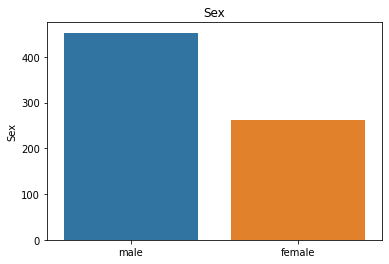

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


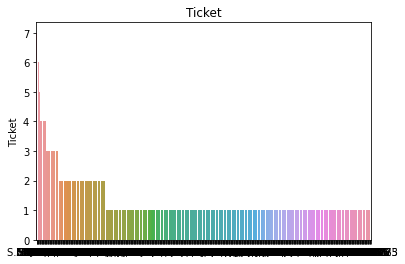

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


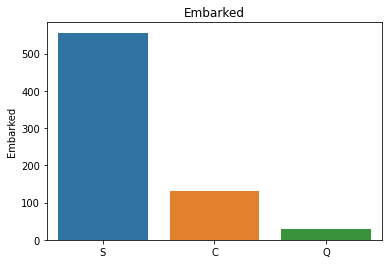

In [91]:
#  visualisasi data non numerik
for x in train_obj:
  sns.barplot(train_obj[x].value_counts().index,train_obj[x].value_counts()).set_title(x)
  plt.show()